In [52]:
import LE3_GC_ProductReader as pr

In [53]:
import glob

In [54]:
import os

Elisa_BOSS_2pcf/

In [65]:
bin = 'z2'

In [66]:
xml_reciso_target = sorted(glob.glob(f'/home/emaragliano/Work/Projects/myfarm-disk/BossAnalysis/myBOSS_2pcf/reconstructed/Elisa_BOSS_2pcf/rec-iso/*/{bin}/Smth_15/EUC_LE3_GCL_2PCF*.xml'))

In [67]:
xml_reciso_target

['/home/emaragliano/Work/Projects/myfarm-disk/BossAnalysis/myBOSS_2pcf/reconstructed/Elisa_BOSS_2pcf/rec-iso/North/z2/Smth_15/EUC_LE3_GCL_2PCF_Smth_Smth_15_ZAreconstructed_Correlation_AUTO_REC_2DPOL_22D44322692B_20240721T193923.0Z.xml',
 '/home/emaragliano/Work/Projects/myfarm-disk/BossAnalysis/myBOSS_2pcf/reconstructed/Elisa_BOSS_2pcf/rec-iso/South/z2/Smth_15/EUC_LE3_GCL_2PCF_Smth_Smth_15_ZAreconstructed_Correlation_AUTO_REC_2DPOL_E32CE4E7DE67_20240721T194420.0Z.xml']

In [68]:
xml_unrec_target = sorted(glob.glob('/farmdisk1/lentini/Work/Project/xi/BOSS_*/low/EUC_LE3_GCL_2PCF_BOSS_*_low_wstar_Correlation_AUTO_2DPOL_*.xml'))

In [69]:
xml_unrec_target

['/farmdisk1/lentini/Work/Project/xi/BOSS_North/low/EUC_LE3_GCL_2PCF_BOSS_NORTH_low_wstar_Correlation_AUTO_2DPOL_73A15C871511_20240706T120504.0Z.xml',
 '/farmdisk1/lentini/Work/Project/xi/BOSS_South/low/EUC_LE3_GCL_2PCF_BOSS_SOUTH_low_wstar_Correlation_AUTO_2DPOL_02972196976E_20240706T111836.0Z.xml']

In [70]:
from pathlib import PurePath
import numpy as np

In [71]:
import matplotlib.pyplot as plt

In [72]:
monopole_reciso_target = []
quadrupole_reciso_target = []
hexadecupole_reciso_target = []

monopole_unrec_target = []
quadrupole_unrec_target = []
hexadecupole_unrec_target = []

xi2D_list_unrec = []
RR_list_unrec = []
DR_list_unrec = []
DD_list_unrec = []
SS_list_unrec = []

xi2D_list_iso = []
RR_list_iso = []
DR_list_iso = []
DD_list_iso = []
SS_list_iso = []


for file_reciso, file_unrec in zip(xml_reciso_target, xml_unrec_target):

    # unreconstructed 
    Product_TwoPoint_unrec = pr.DpdLE3GCReader()
    Product_TwoPoint_unrec.parse_xml(file_unrec)
    Product_TwoPoint_unrec.read_tables()

    bin2num=Product_TwoPoint_unrec.Pairs.header["BIN2NUM"]
    bin1num=Product_TwoPoint_unrec.Pairs.header["BIN1NUM"]

    r = Product_TwoPoint_unrec.CorrelationMultipole.table['SCALE']
    xi0_unrec = Product_TwoPoint_unrec.CorrelationMultipole.table['XI0']
    xi2_unrec = Product_TwoPoint_unrec.CorrelationMultipole.table['XI2']
    xi4_unrec = Product_TwoPoint_unrec.CorrelationMultipole.table['XI4']

    mu_unrec = np.array(Product_TwoPoint_unrec.Correlation.table['SCALE_2D']).reshape(bin1num, bin2num)
    xi2D_unrec = np.array(Product_TwoPoint_unrec.Correlation.table['XI']).reshape(bin1num,bin2num)

    DD = np.reshape(Product_TwoPoint_unrec.Pairs.table["DD"], newshape=(bin1num,bin2num))
    DR = np.reshape(Product_TwoPoint_unrec.Pairs.table["DR"], newshape=(bin1num,bin2num))
    RR = np.reshape(Product_TwoPoint_unrec.Pairs.table["RR"], newshape=(bin1num,bin2num))

    pair_DD=Product_TwoPoint_unrec.Pairs.header["PAIR_DD"]
    pair_RR=Product_TwoPoint_unrec.Pairs.header["PAIR_RR"]
    pair_DR=Product_TwoPoint_unrec.Pairs.header["PAIR_DR"]            ## THERE IS THE SHIFTED CAT
 

    RR_list_unrec.append(RR)
    DR_list_unrec.append(DR)
    DD_list_unrec.append(DD)


    xi2D_list_unrec.append(xi2D_unrec)

    monopole_unrec_target.append(xi0_unrec)
    quadrupole_unrec_target.append(xi2_unrec)
    hexadecupole_unrec_target.append(xi4_unrec)

    # rec iso
    Product_TwoPoint_iso = pr.DpdLE3GCReader()
    Product_TwoPoint_iso.parse_xml(file_reciso)
    Product_TwoPoint_iso.read_tables()
    xi0_reciso = Product_TwoPoint_iso.CorrelationMultipole.table['XI0'] 
    xi2_reciso = Product_TwoPoint_iso.CorrelationMultipole.table['XI2']
    xi4_reciso = Product_TwoPoint_iso.CorrelationMultipole.table['XI4']

    pair_DD_iso=Product_TwoPoint_iso.Pairs.header["PAIR_DD"]
    pair_RR_iso=Product_TwoPoint_iso.Pairs.header["PAIR_RR"]

    bin2num_iso=Product_TwoPoint_iso.Pairs.header["BIN2NUM"]
    bin1num_iso=Product_TwoPoint_iso.Pairs.header["BIN1NUM"]

    DD_iso = np.reshape(Product_TwoPoint_iso.Pairs.table["DD"], newshape=(bin1num_iso,bin2num_iso))
    RR_iso = np.reshape(Product_TwoPoint_iso.Pairs.table["RR"], newshape=(bin1num_iso,bin2num_iso))
    DR_iso = np.reshape(Product_TwoPoint_iso.Pairs.table["DS"], newshape=(bin1num_iso,bin2num_iso))
    SS_iso = np.reshape(Product_TwoPoint_iso.Pairs.table["SS"], newshape=(bin1num_iso,bin2num_iso))

    monopole_reciso_target.append(xi0_reciso)
    quadrupole_reciso_target.append(xi2_reciso)
    hexadecupole_reciso_target.append(xi4_reciso)

    RR_list_iso.append(RR_iso)
    DR_list_iso.append(DR_iso)
    DD_list_iso.append(DD_iso)
    SS_list_iso.append(SS_iso)

    mu_iso = np.array(Product_TwoPoint_iso.Correlation.table['SCALE_2D']).reshape(bin1num_iso, bin2num_iso)
    xi2D_iso = np.array(Product_TwoPoint_iso.Correlation.table['XI']).reshape(bin1num_iso,bin2num_iso)
    xi2D_list_iso.append(xi2D_iso)


(-3.0, 3.0)

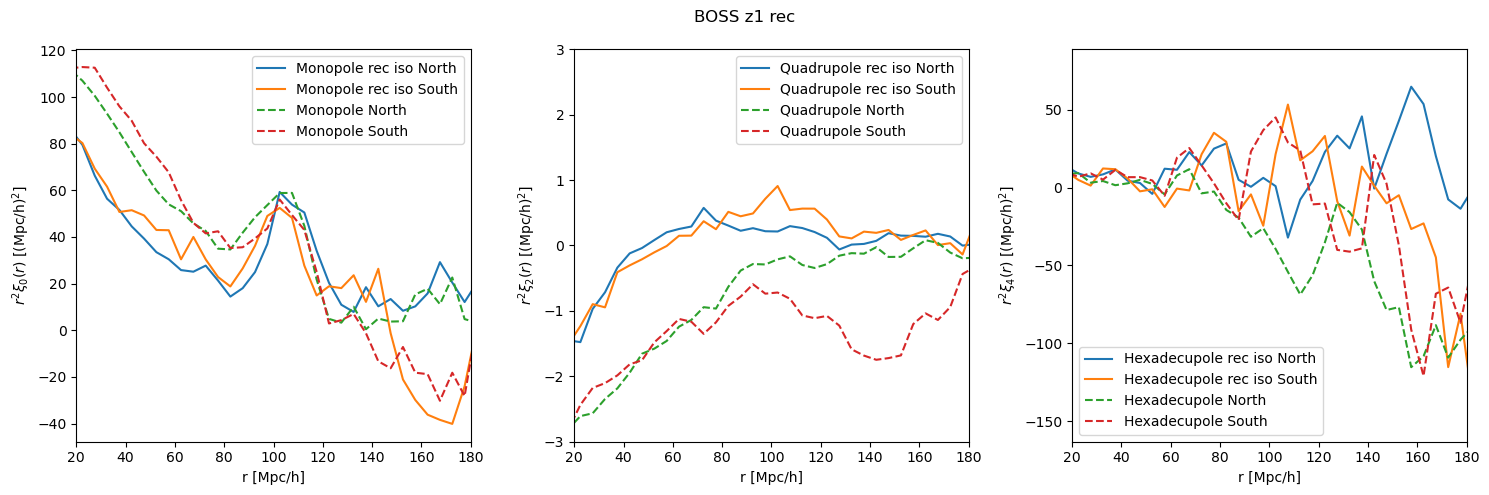

In [73]:

fig, axs = plt.subplots(1, 3, figsize=(15, 5))
labels = ['North', 'South']
i = 0
for mon, quad, hex in zip(monopole_reciso_target, quadrupole_reciso_target, hexadecupole_reciso_target):

    axs[0].plot(r, r**2*mon, label='Monopole rec iso '+labels[i])
    axs[0].set_ylabel(r'$r^2 \xi_{0}(r)\ [\text{(Mpc/h)}^2]$')
    axs[1].plot(r, r*quad, label='Quadrupole rec iso '+labels[i])
    axs[1].set_ylabel(r'$r^2 \xi_{2}(r)\ [\text{(Mpc/h)}^2]$')
    axs[2].plot(r, r**2*hex, label='Hexadecupole rec iso '+labels[i])
    axs[2].set_ylabel(r'$r^2 \xi_{4}(r)\ [\text{(Mpc/h)}^2]$')
    i += 1
    
i=0
for mon, quad, hex in zip(monopole_unrec_target, quadrupole_unrec_target, hexadecupole_unrec_target):
    axs[0].plot(r, r**2*mon, label='Monopole '+labels[i], linestyle='--')
    axs[1].plot(r, r*quad, label='Quadrupole '+labels[i], linestyle='--')
    axs[2].plot(r, r**2*hex, label='Hexadecupole '+labels[i], linestyle='--')


    for ax in axs:
        ax.legend()
        ax.set_xlabel('r [Mpc/h]')
        ax.set_xlim(20,180)
    fig.tight_layout()
    fig.suptitle('BOSS z1 rec')

    i += 1
axs[1].set_ylim(-3,3)
        

### merge nord with south 

$\xi_{tot} = (\xi_N RR_N + \xi_S RR_S)/(RR_S+RR_N)$

In [74]:
xi_tot_unrec = (xi2D_list_unrec[0]*RR_list_unrec[0]+xi2D_list_unrec[1]*RR_list_unrec[1])/(RR_list_unrec[0]+RR_list_unrec[1])
xi_tot_iso = (xi2D_list_iso[0]*RR_list_iso[0]+xi2D_list_iso[1]*RR_list_iso[1])/(RR_list_iso[0]+RR_list_iso[1])

In [75]:
#from MyThesisLibrary.ComputeXi import multipole_from_xi2D
from scipy.special import eval_legendre

In [76]:
rec_z1_ross_xi0 = np.loadtxt('/home/emaragliano/Work/Projects/myfarm-disk/BossAnalysis/Ross_2016_COMBINEDDR12/Ross_2016_COMBINEDDR12_zbin1_correlation_function_monopole_post_recon_bincent0.dat', usecols=(0,1,2))
rec_z1_ross_xi2 = np.loadtxt('/home/emaragliano/Work/Projects/myfarm-disk/BossAnalysis/Ross_2016_COMBINEDDR12/Ross_2016_COMBINEDDR12_zbin1_correlation_function_quadrupole_post_recon_bincent0.dat', usecols=(0,1,2))
unrec_z1_satpathy_xi0 = np.loadtxt('//home/emaragliano/Work/Projects/myfarm-disk/BossAnalysis/Satpathy_etal_2016_COMBINEDDR12_full_shape_corrfunc_multipoles/Satpathy_2016_COMBINEDDR12_Bin1_Monopole_pre_recon.dat', usecols=(0,1)) 
unrec_z1_satpathy_xi2 = np.loadtxt('//home/emaragliano/Work/Projects/myfarm-disk/BossAnalysis/Satpathy_etal_2016_COMBINEDDR12_full_shape_corrfunc_multipoles/Satpathy_2016_COMBINEDDR12_Bin1_Quadrupole_pre_recon.dat', usecols=(0,1)) 

In [77]:
def multipole_from_xi2D(xi2D, mu, l=0):
    """
    
    Parameters
    ----------
    xi2D : 2D array
        2D correlation function.
    mu : 2D array
        2D array of mu values.
    l : int
        Multipole order.
        
    Returns
    -------
        array
        Multipole.
        
        """
    multipole = []
    dmu=mu[0][1]-mu[0][0]                        ## measure of the mu bin assuming dmu is constant forall r, mu
    for i in range(0, len(xi2D)):
        P_l=eval_legendre(l,mu[i,:])   
        appo=np.array(xi2D[i]*P_l)                   ##the product is element-wise
        multipole.append(appo)
    multipole = 0.5*(2*l+1)*dmu*np.array(multipole).sum(axis=1)     

    return np.array(multipole)


import covariance to have errorbars

In [78]:
cov_z1_C = np.load(os.path.join('/farmdisk1/lentini/Work/Project/Covariance_matrix', 'cov_xi_z1.npy'))
sigmas_z1_C = np.sqrt(np.diag(cov_z1_C))

sigmas_mon = sigmas_z1_C[0:40]
sigmas_quad = sigmas_z1_C[40:]

In [79]:
sigmas_z1_C.shape

(80,)

In [80]:
xi0_tot = multipole_from_xi2D(xi_tot_unrec, mu_unrec, 0)
xi2_tot = multipole_from_xi2D(xi_tot_unrec, mu_unrec, 2)
xi4_tot = multipole_from_xi2D(xi_tot_unrec, mu_unrec, 4)

xi0_tot_iso = multipole_from_xi2D(xi_tot_iso, mu_iso, 0)
xi2_tot_iso = multipole_from_xi2D(xi_tot_iso, mu_iso, 2)
xi4_tot_iso = multipole_from_xi2D(xi_tot_iso, mu_iso, 4)

Text(0, 0.5, '$r^2 \\xi_{0}(r)\\ [\\text{(Mpc/h)}^2]$')

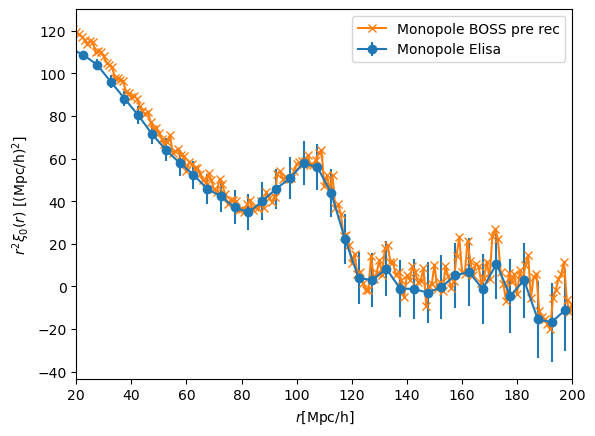

In [81]:
plt.errorbar(r, r**2*xi0_tot, yerr=r**2*sigmas_mon, label='Monopole Elisa', marker='o')
#plt.plot(r, r**2*xi0_tot_iso, label='Monopole rec-iso', marker='o')
plt.plot(unrec_z1_satpathy_xi0[:,0], unrec_z1_satpathy_xi0[:,0]**2*unrec_z1_satpathy_xi0[:,1], label='Monopole BOSS pre rec', marker='x')
plt.legend()
plt.xlim(20,200)
plt.xlabel(r'$r [\text{Mpc/h}]$')
plt.ylabel(r'$r^2 \xi_{0}(r)\ [\text{(Mpc/h)}^2]$')

Text(0, 0.5, '$r^2 \\xi_{0}(r)\\ [\\text{(Mpc/h)}^2]$')

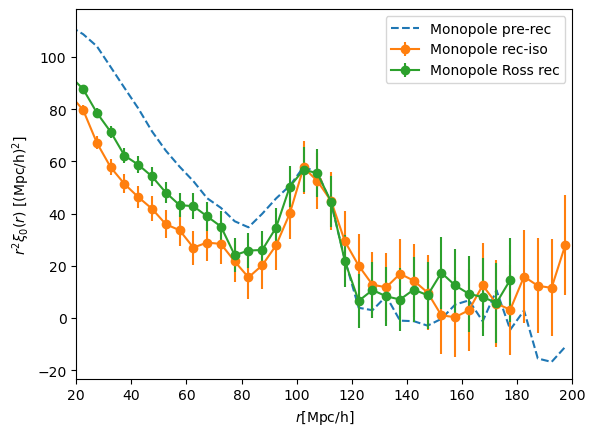

In [82]:
plt.plot(r, r**2*xi0_tot, label='Monopole pre-rec', linestyle = '--')
plt.errorbar(r, r**2*xi0_tot_iso, yerr =r**2*sigmas_mon, label='Monopole rec-iso', marker='o')
plt.errorbar(rec_z1_ross_xi0[:,0], rec_z1_ross_xi0[:,0]**2*rec_z1_ross_xi0[:,1], yerr=rec_z1_ross_xi0[:,0]**2*rec_z1_ross_xi0[:,2], label='Monopole Ross rec', marker='o')
plt.legend()
plt.xlim(20,200)
plt.xlabel(r'$r [\text{Mpc/h}]$')
plt.ylabel(r'$r^2 \xi_{0}(r)\ [\text{(Mpc/h)}^2]$')

Text(0, 0.5, '$r \\xi_{2}(r)\\ [\\text{(Mpc/h)}^2]$')

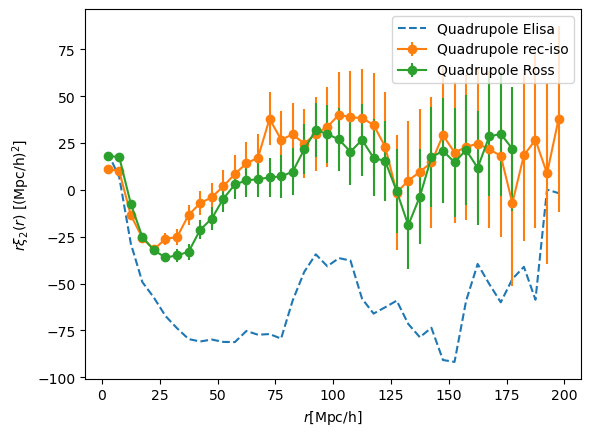

In [83]:
plt.plot(r, r**2*xi2_tot, label='Quadrupole Elisa', linestyle='--')
plt.errorbar(r, r**2*xi2_tot_iso, yerr= r**2*sigmas_quad, label='Quadrupole rec-iso', marker='o')
plt.errorbar(rec_z1_ross_xi2[:,0], rec_z1_ross_xi2[:,0]**2*rec_z1_ross_xi2[:,1], yerr=rec_z1_ross_xi2[:,0]**2*rec_z1_ross_xi2[:,2], label='Quadrupole Ross', marker='o')
plt.legend()

plt.xlabel(r'$r [\text{Mpc/h}]$')
plt.ylabel(r'$r \xi_{2}(r)\ [\text{(Mpc/h)}^2]$')

In [85]:
np.save(f'myBOSS_rec_multipoles_{bin}', [r, xi0_tot_iso, xi2_tot_iso, xi4_tot_iso])